# Brief Overview on Ridge and Lasso 

Rirge and Lasso regression models are powerful techniques generally used for creating "parsimonious" models in presence of a "large number of features". Here "large" can typically mean either of two things:

1. Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfi tting)
2. Large enough to cause computational challenges.

With modern systems, this situation might arise in case of millions orbillions of features.

Though *Ridge* and *Lasso* might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. If you've heard of them before, you must know that they work by penalizing the magnitude of coefficients offeatures along with minimizing the error between predicted and actual observations. 

---
These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coeffi cients:

1. **Ridge Regression:** Performs $L2$ regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients.

> Minimization objective = $LS-Obj$ + $\alpha$ * (sum of square of coefficients)

2. **Lasso Regression:** Performs $L1$ regularization, i.e. adds penalty equivalent to absolute value of the magnitude
of coefficients.

> Minimization objective = $LS-Obj$ + $α$ * (sum of absolute value of coeffi cients)

Note that here $LS-Obj$ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

---

Lets try to understand the impact of model complexity on the magnitude of coefficients. As an example, I have simulated a sine-curve (between 60° and 300°) and added some random noise using the following code:

a. Initialize predictors to all 15 powers of x$


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

First, we’ll define a generic function which takes in the required maximum power of x as an input and returns a list containing –
[model RSS, intercept, coef_x, coef_x2, … upto entered power ].

Here RSS refers to *Residual Sum of Squares* which is nothingbut the sum of square of errors between the predicted and actual values in the training data set. The python code goes as follows:


a. Defining independent variables as angles from 60° to 300° converted to radians

In [ ]:
x = np.array([i*np.pi/180 for i in range(10,360,3)])

b. Set the random seed for reproducible results: 

In [ ]:
np.random.seed(10)

c. Defining the target/dependent variable as $sin()$ of the independent variable $x$

In [ ]:
y = np.sin(x) * np.random.normal(0,0.15,len(x))

d. Create a 'date.frame' with independent and dependent variables

In [ ]:
data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])

data.head()

,x,y
0,0.174533,0.034684
1,0.226893,0.024135
2,0.279253,-0.063896
3,0.331613,-0.000409
4,0.383972,0.034913


This resembles a sine curve but not exactly because of the noise. We’ll use this as an example to test different scenarios. Let's try to estimate the sine function using **polynomial regression** with powers of $x$ from $1$ to $15$.

Let's add a column foreach power upto 15 in our dataframe. This can be accomplished using the following code:

In [ ]:
for i in range(2,16):
    colname = 'x_%d'%i
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.034684,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.024135,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,-0.063896,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,-0.000409,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.034913,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


---

## Train-test data

Let's now split the data into 'train' and 'test' data:

In [ ]:
data['randNumCol'] = np.random.randint(1,6,data.shape[0])

train = data[data['randNumCol']<=3]

test = data[data['randNumCol']>3]

train = train.drop('randNumCol', axis=1)

test = test.drop('randNumCol', axis=1)

---

## Defining the linear regression

We import the *linear regression model* from `scikit-learn`:

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = train.drop('y',axis=1).values
y_train = train['y'].values

X_test = test.drop('y',axis=1).values
y_test = test['y'].values


### Regression model 1

We shall define now the regression model with *one* feature

In [ ]:
independent_variable_train = X_train[:,0:1]

linreg = LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Collecting **RSS** for `train data`:

In [ ]:
rss_train =sum((y_train_pred - y_train)**2) / X_train.shape[0]
print("Train Error", rss_train)

Train Error 0.012727915855398148


plotting results in `train data`:

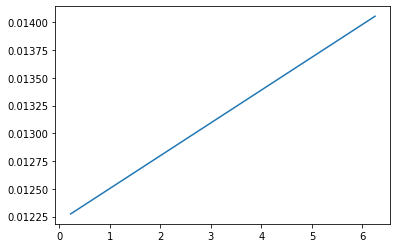

In [ ]:
plt.plot(X_train[:,0:1],y_train_pred)

Now, we move ahead into **testing** the model performance:

In [ ]:
independent_variable_test = X_test[:,0:1]
y_test_pred = linreg.predict(independent_variable_test)

Now, we collect **RSS** for `test data`:

In [ ]:
rss_test =sum((y_test_pred - y_test)**2) / X_test.shape[0]
print("Test Error", rss_test)

Test Error 0.012439764672870782


Plotting results in `test data`:

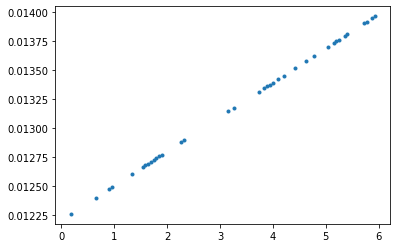

In [ ]:
plt.plot(X_test[:,0:1],y_test_pred,'.')

### Model 2

We shall define now the regression model with *three* features


In [ ]:
independent_variable_train = X_train[:,0:3]

linreg = LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)


Train Error 0.01269886071136656


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Train Error 0.01269886071136656


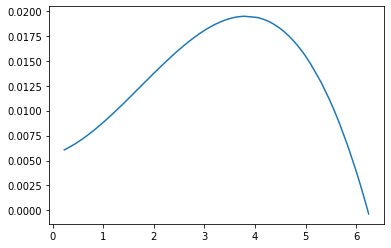

In [ ]:
rss_train =sum((y_train_pred - y_train)**2) / X_train.shape[0]
print("Train Error", rss_train)
plt.plot(X_train[:,0:1],y_train_pred)


Results with `test-data`

Test Error 0.012685790756220304


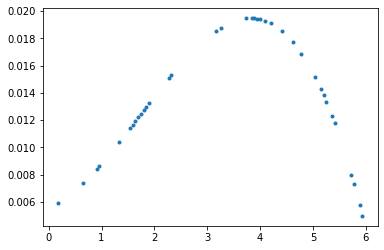

In [ ]:
independent_variable_test = X_test[:,0:3]
y_test_pred = linreg.predict(independent_variable_test)
rss_test =sum((y_test_pred - y_test)**2) / X_test.shape[0]
print("Test Error", rss_test)
plt.plot(X_test[:,0:1],y_test_pred,'.')


---

### Additional comments

Let us define a generic function which takes in the required maximum power of $x$ as an input and returns a list containing *—
[ model RSS, intercept, coef_x, coef_x2, …upto entered power ]-*.

Here `RSS` refers to ‘Residual Sum of Squares’ which is nothing butthe sum of square of errors between the predicted and actual values in the trainingdata set. The python code defining the function is as follows.

Let's import Linear Regression model from scikit-learn.


In [ ]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
  # Initialize predictors:
  predictors=['x']
  if power>=2:
    predictors.extend(['x_%d'%i for i in range(2,power+1)])

  #Fit the model
  linreg = LinearRegression(normalize=True)
  linreg.fit(data[predictors],data['y'])
  y_pred = linreg.predict(data[predictors])  

  # Check if a plot is to be made for the entered power
  if power in models_to_plot:
    plt.subplot(models_to_plot[power])
    plt.tight_layout()
    plt.plot(data['x'],y_pred)
    plt.plot(data['x'],data['y'],'.')
    plt.title('Plot for power: %d'%power)

  # Return the result in pre-defined format
  rss = sum((y_pred-data['y'])**2)
  ret = [rss]
  ret.extend([linreg.intercept_])
  ret.extend(linreg.coef_)
  return ret

Note that this function will not plot the model fit for all the powers but will return the `RSS` and coefficients for all the models. 

Let's skip the details of the code for now to maintain brevity. 

Now, we can make all `15` models and compare the results. For ease of analysis, we'll store all the results in a Pandas dataframeand plot 6 models to get an idea of the trend. Consider the following code:

a. Initialize a dataframe to store the results:

In [ ]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

b. Define the powers for which a plot is required:


In [ ]:
for i in range(1,16):

c. Iterate through all powers and assimilate results

In [ ]:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
  coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

## Ridge Regression

As mentioned before, ridge regression performs `L2 regularization`, i.e. it adds a factor of sum of squares of coeffi cients in theoptimization objective. 

Thus, ridge regression optimizes the following:

> Objective = RSS + $\alpha$ * (sum of square of coeffi cients)

Here, $\alpha$ (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square ofcoeffi cients. $\alpha$ can take various values:

1. $\alpha = 0:$
The objective becomes same as simple linear regression.
We’ll get the same coeffi cients as simple linear regression.

2. $\alpha = \infty$:
The coeffi cients will be zero. Why? Because of infi nite weightage on square of coeffi cients, anything less than zerowill make the objective infi nite.

3. $0 < \alpha < \infty$:
The magnitude of $\alpha$ will decide the weightage given to different parts of objective. 

The coefficients will be somewhere between 0 and ones for simple linear regression.

In [ ]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
  #Fit the model
  ridgereg = Ridge(alpha=alpha,normalize=True)
  ridgereg.fit(data[predictors],data['y'])
  y_pred = ridgereg.predict(data[predictors])

  #Check if a plot is to be made for the entered alpha
  if alpha in models_to_plot:
    plt.subplot(models_to_plot[alpha])
    plt.tight_layout()
    plt.plot(data['x'],y_pred)
    plt.plot(data['x'],data['y'],'.')
    plt.title('Plot for alpha: %.3g'%alpha)

  #Return the result in pre-defined format
  rss = sum((y_pred-data['y'])**2)
  ret = [rss]
  ret.extend([ridgereg.intercept_])
  ret.extend(ridgereg.coef_)
  return ret

Now, lets analyze the result of Ridge regression for 10 different values of α ranging from $1e-15$ to $20$. These values have beenchosen so that we can easily analyze the trend with change in values of $\alpha$. These would however differ from case to case.

Note that each of these 10 models will contain all the 15 variables and only the value of alpha would differ. This is different fromthe simple linear regression case where each model had a subset of features.

a. Initialize predictors to be set of $15$ powers of $x$

In [ ]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

b. Set the different values of alpha to be tested

In [ ]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

c. Initialize the dataframe for storing coefficients

In [ ]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.49496e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureW

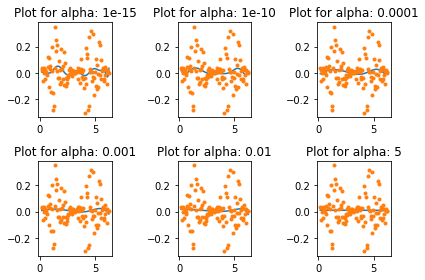

In [ ]:
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
  coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

Let's observe that as the value of alpha increases, the model complexity reduces. Though higher values of alphareduce overfi tting, signifi cantly high values can cause underfi tting as well (eg. $\alpha = 5$). Thus alpha should be chosen wisely. Awidely accept technique is cross-validation, i.e. the value of alpha is iterated over a range of values and the one giving higher cross-validation score is chosen.

Lets have a look at the value of coeffi cients in the above models:

a. Set the display format to be scientific for ease of analysis

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.4,0.084,-0.99,4.7,-11,14,-10,4.3,-0.99,0.073,0.019,-0.0045,0.00011,6.6e-05,-7.5e-06,1.7e-07,7.3e-09
alpha_1e-10,1.4,0.077,-0.41,0.65,-0.34,0.029,0.026,-0.0052,-0.00056,0.00011,2.1e-05,-3.6e-07,-5.3e-07,-5.5e-08,6.6e-09,2e-09,-1.9e-10
alpha_1e-08,1.4,0.037,-0.2,0.35,-0.2,0.039,0.0015,-0.00073,-8.9e-05,4.4e-06,2.5e-06,3.1e-07,9.1e-10,-6.8e-09,-1.3e-09,-6.7e-11,3.1e-11
alpha_0.0001,1.5,-0.014,0.053,-0.018,-0.00099,0.00022,5.8e-05,7.9e-06,6.2e-07,-2.4e-08,-2.2e-08,-5.4e-09,-9.7e-10,-1.3e-10,-9.1e-12,1.7e-12,9.8e-13
alpha_0.001,1.5,0.0042,0.022,-0.0085,-0.00037,9.8e-05,2.5e-05,3.5e-06,3e-07,-3.7e-09,-7.8e-09,-2e-09,-3.6e-10,-4.9e-11,-3.8e-12,4.2e-13,2.9e-13
alpha_0.01,1.5,0.017,-0.0002,-0.0017,-7.1e-05,2.1e-05,5.8e-06,9.5e-07,1.2e-07,1e-08,2.1e-10,-1.7e-10,-5.1e-11,-1e-11,-1.7e-12,-2.3e-13,-2.2e-14
alpha_1,1.5,0.011,-0.0006,-3.5e-05,3.4e-06,1.5e-06,2.9e-07,4.5e-08,5.8e-09,5.9e-10,2.9e-11,-6.4e-12,-2.8e-12,-7.3e-13,-1.6e-13,-3.1e-14,-5.9e-15
alpha_5,1.5,0.01,-0.00014,-9.7e-06,2.5e-07,2.1e-07,4.3e-08,6.1e-09,6e-10,1.4e-11,-1.3e-11,-4.6e-12,-1.2e-12,-2.5e-13,-4.9e-14,-9.4e-15,-1.7e-15
alpha_10,1.5,0.01,-8e-05,-6.3e-06,-1.4e-07,5.9e-08,1.3e-08,1.6e-09,5.5e-11,-3.5e-11,-1.4e-11,-3.5e-12,-7.8e-13,-1.6e-13,-3e-14,-5.6e-15,-1e-15
alpha_20,1.5,0.0098,-4.5e-05,-4e-06,-2.2e-07,2.2e-09,1.8e-09,-1.7e-11,-1.1e-10,-4.1e-11,-1.1e-11,-2.4e-12,-5e-13,-9.7e-14,-1.8e-14,-3.3e-15,-5.8e-16


This straight away gives us the following inferences:

1. The RSS increases with increase in $\alpha$, this model complexity reduces

2. An alpha as small as $1e-15$ gives us significant reduction in magnitude of coefficients. How? Compare the coeffi cients inthe fi rst row of this table to the last row of simple linear regression table.

3. High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1

4. Though the coeffi cients are very very small, they are NOT zero.

The first $3$ are very intuitive. But $4th$ is also a crucial observation. 

Let’s reconfirm the same by determining the number of zerosin each row of the coefficients data set:

In [ ]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

This confi rms that all the $15$ coefficients are greater than zero in magnitude (can be +ve or -ve). Remember this observation andhave a look again until its clear. This will play an important role in later while comparing ridge with lasso regression.

## Lasso Regression

**Lasso** stands for 'Least Absolute Shrinkage and Selection Operator'. I know it doesn’t give much of an idea but there are 2 keywords here – ‘absolute‘ and ‘selection‘.

Lets consider the former fi rst and worry about the latter later.

Lasso regression performs **L1 regularization**, i.e. it adds a factor of sum of absolute value of coeffi cients in the optimization objective.

Like that of ridge, α can take various values. Lets iterate it here briefl y:

1. $\alpha = 0$: Same coefficients as simple linear regression

2. $\alpha = ∞$: All coefficients zero (same logic as before)

3. $0 < \alpha < \infty$: Coefficients between 0 and that of simple linear regression.

Yes its appearing to be very similar to Ridge till now. But just hang on with me and you'll know the difference by the time we finish.

Like before, lets run lasso regression on the same problem as above. First we'll defi ne a generic function:

In [ ]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
  lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
  lassoreg.fit(data[predictors],data['y'])
  y_pred = lassoreg.predict(data[predictors])
  
  if alpha in models_to_plot:
    plt.subplot(models_to_plot[alpha])
    plt.tight_layout()
    plt.plot(data['x'],y_pred)
    plt.plot(data['x'],data['y'],'.')
    plt.title('Plot for alpha: %.3g'%alpha)

  rss = sum((y_pred-data['y'])**2)
  ret = [rss]
  ret.extend([lassoreg.intercept_])
  ret.extend(lassoreg.coef_)
  return ret

Notice the additional parameters defi ned in Lasso function – 'max_iter'. This is the maximum number of iterations for which wewant the model to run if it doesn’t converge before. This exists for Ridge as as well but setting this to a higher than default valuewas required in this case. Why? I’ll come to this in next section, just keep it in the back of the envelope.

Lets check the output for 10 different values of alpha using the following code:

In [ ]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

b. Define the alpha values to test

In [ ]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]


c. Initialize the dataframe to store coefficients


In [ ]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

c. Define the models to plot

In [ ]:
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

d. Iterate over the 10 alpha values:


In [ ]:
for i in range(10):
  coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

NameError: ignored